# Regression Intro
## Linear Regression

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

%matplotlib inline
%matplotlib auto


Using matplotlib backend: Qt5Agg


In [2]:
df = pd.read_csv('home_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


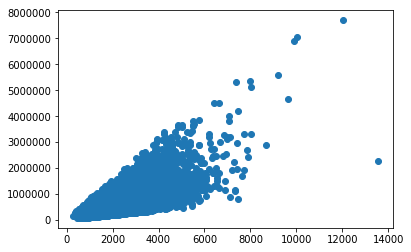

In [4]:
plt.scatter('sqft_living', 'price', data = df)

In [5]:
train_data, test_data =  train_test_split(df, test_size = 0.2)

In [6]:
X_train = train_data.drop(['price'], axis =1)
Y_train = train_data['price']   
X_test = test_data.drop(['price'], axis =1)
Y_test = test_data['price']

### Building and Plotting the model

#### 1) One feature Model

In [8]:
def sqft_model():
    sqft_model = LinearRegression()
    sqft_model.fit(pd.DataFrame(X_train.sqft_living), Y_train)

    sqft_model.score(pd.DataFrame(X_train.sqft_living), Y_train)
    sqft_model.score(pd.DataFrame(X_test.sqft_living), Y_test)

    Y_pred_train = sqft_model.predict(pd.DataFrame(X_train.sqft_living))
    Y_pred_test = sqft_model.predict(pd.DataFrame(X_test.sqft_living))

    print("Mean Squared Error on training set: {}".format(mean_squared_error(Y_train, Y_pred_train)**0.5))
    print("Mean Squared Error on test set: {}".format(mean_squared_error(Y_test, Y_pred_test)**0.5))



    print("Variance on training set: {}".format(r2_score(Y_train, Y_pred_train)))
    print("Variance on test set: {}".format(r2_score(Y_test, Y_pred_test)))
    

    plt.plot(test_data['sqft_living'], test_data['price'], '.',
             test_data['sqft_living'],  Y_pred_test, '-')

    print("Coefficient: {}".format(sqft_model.coef_))
    print("Intercept: {}".format(sqft_model.intercept_))
    return  None


Mean Squared Error on training set: 263204.038055646
Mean Squared Error on test set: 254268.32754679443
Variance on training set: 0.4937990242552648
Variance on test set: 0.4887516468187496
Coefficient: [281.0319226]
Intercept: -44666.10861770017


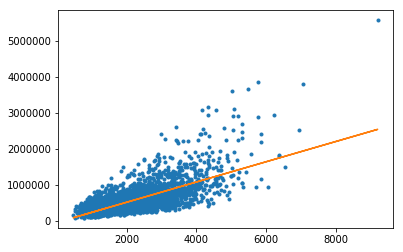

In [9]:
sqft_model()

#### 2) Multiple Feature Model

In [10]:

def somefeatures_model(X_train, X_test, Y_train, Y_test):
    
    sqft_model = LinearRegression()
    sqft_model.fit(X_train, Y_train)

    sqft_model.score(X_train, Y_train)
    sqft_model.score(X_test, Y_test)

    Y_pred_train = sqft_model.predict(X_train)
    Y_pred_test = sqft_model.predict(X_test)

    print("Mean Squared Error on training set: {}".format(mean_squared_error(Y_train, Y_pred_train)**0.5))
    print("Mean Squared Error on test set: {}".format(mean_squared_error(Y_test, Y_pred_test)**0.5))



    #print("Variance on training set: {}".format(r2_score(Y_train, Y_pred_train)))
    #print("Variance on test set: {}".format(r2_score(Y_test, Y_pred_test)))
    

    plt.plot(test_data['price'],Y_pred_test)

    #print("Coefficient: {}".format(sqft_model.coef_))
    #print("Intercept: {}".format(sqft_model.intercept_))
    return  None


Mean Squared Error on training set: 202541.13458756654
Mean Squared Error on test set: 195576.72792904716


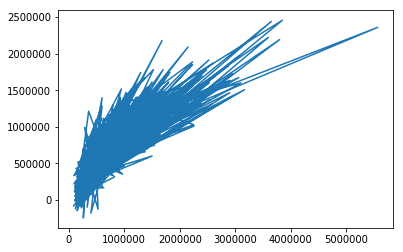

In [11]:
somefeatures_model(X_train.select_dtypes(include='number'), X_test.select_dtypes(include='number'), Y_train, Y_test) 

Mean Squared Error on training set: 263204.038055646
Mean Squared Error on test set: 254268.32754679443
Variance on training set: 0.4937990242552648
Variance on test set: 0.4887516468187496
Coefficient: [281.0319226]
Intercept: -44666.10861770017
Mean Squared Error on training set: 257416.47233242507
Mean Squared Error on test set: 248423.1923610663


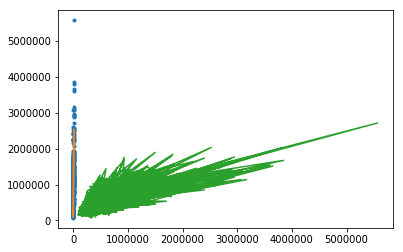

In [12]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

sqft_model()
somefeatures_model(X_train[my_features], X_test[my_features], Y_train, Y_test) 


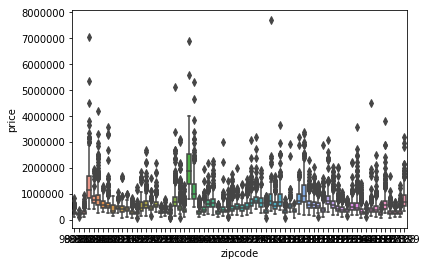

In [14]:
sns.boxplot(x = 'zipcode', y = 'price',  data = df)